# Explore trained models

In [11]:
from src.data.pipelines import convnet_pipeline
from src.models import early_convnet

import os
import datetime

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [12]:
# Pipeline
BATCH_SIZE_IMAGES = 1
BATCH_SIZE_PATCHES = 1
IMAGE_SIZE = 224
PATCH_SIZE = 40
PATCH_SIZE_ANNOTATION = 2
PATCH_STRIDE = 1
SLICE_TRAIN = ':10'
SLICE_VALID = '10:12'
SLICE_TEST = '700:720'

checkpoint_filepath = os.path.join(os.getcwd(),'..', 'models', 'ckpt', 'early_convnet')

In [13]:
input_pipeline = convnet_pipeline.ConvnetPipeline(
    SLICE_TRAIN,
    SLICE_VALID,
    SLICE_TEST,
    BATCH_SIZE_IMAGES,
    BATCH_SIZE_PATCHES,
    IMAGE_SIZE,
    PATCH_SIZE,
    PATCH_SIZE_ANNOTATION,
    PATCH_STRIDE
)

In [14]:
def display(display_list):
    plt.figure(figsize=(5, 5))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    print(len(display_list))
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.utils.array_to_img(display_list[i][0]))
        plt.axis('off')
    plt.show()

In [15]:
checkpoint_filepath

'/workspaces/CM3070_Final_project/notebooks/../models/ckpt/early_convnet'

In [16]:
model = early_convnet.EarlyConvnet()
latest = tf.train.latest_checkpoint(checkpoint_filepath)
model.build((None, PATCH_SIZE, PATCH_SIZE, 3))
model.load_weights(latest)

(34225, 40, 40, 3)
1070/1070 [==============================] - 6s 5ms/step
3


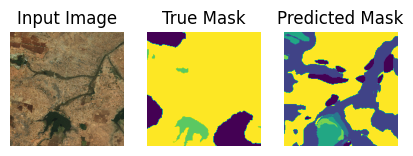

(34225, 40, 40, 3)
1070/1070 [==============================] - 5s 5ms/step
3


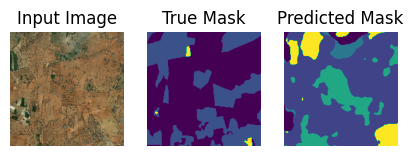

(34225, 40, 40, 3)
1070/1070 [==============================] - 5s 4ms/step
3


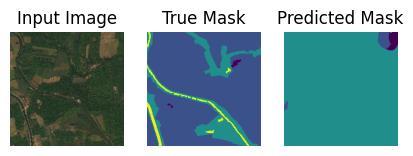

(34225, 40, 40, 3)
1070/1070 [==============================] - 5s 4ms/step
3


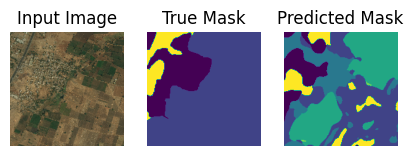

(34225, 40, 40, 3)
1070/1070 [==============================] - 5s 5ms/step
3


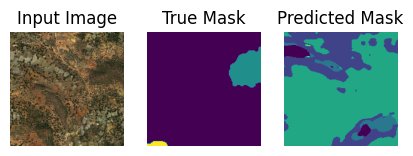

(34225, 40, 40, 3)
1070/1070 [==============================] - 5s 5ms/step
3


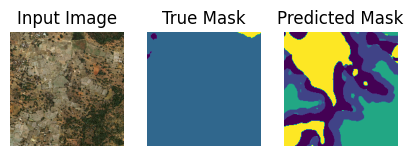

(34225, 40, 40, 3)
1070/1070 [==============================] - 5s 5ms/step
3


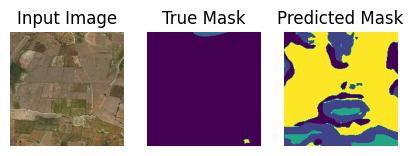

(34225, 40, 40, 3)
1070/1070 [==============================] - 4s 4ms/step
3


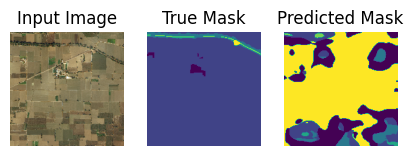

In [18]:
for p, m, i in input_pipeline.test.take(8):
    # print(tf.unique(tf.argmax(tf.reshape(m, shape=[-1, 7]), axis=1)))
    gt = m
    print(p.shape)
    y = model.predict(p)
    gt_mask = tf.reshape(tf.argmax(input=gt, axis=3), shape=(1, 185, 185, 1))
    mask = tf.reshape(tf.argmax(input=y, axis=3), shape=(1, 185, 185, 1))
    display([i, gt_mask, mask])
    # display(gt_mask)